<a href="https://colab.research.google.com/github/meetAmarAtGithub/Reva_NLPandText-Analytics/blob/main/SpamOrHam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Or Ham *Analysis***

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics"

/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/spam.csv
/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/SpamOrHam.ipynb
/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/IITJ_SpamHam/enronSpamSubset.csv
/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/IITJ_SpamHam/lingSpam.csv
/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/IITJ_SpamHam/Question2_SpamOrHam_old.ipynb
/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/IITJ_SpamHam/Question2_SpamOrHam.ipynb
/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/IITJ_SpamHam/Question2_SpamOrHam_GDrive.ipynb


In [ ]:
import string
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer


import nltk
from textblob import Word 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# <font color="brown"><b>Data Loading</b></font>

In [ ]:
spamham_file = '/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/spam.csv'

In [ ]:
import chardet
with open(spamham_file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7270322499829184, 'encoding': 'Windows-1252', 'language': ''}

In [ ]:
df = pd.read_csv(spamham_file,encoding='ISO-8859-1')
df.head(10)
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
lingspam = df[['v1','v2']]
lingspam.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## <font color="blue">Spam and ham record count in the data</font>

In [ ]:
# 60% of emails are ham and 40% spam
lingspam['v1'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

<font color="green">13.4% data is spam and 86.59% data is ham.</font>

#<font color='brown'><b>Data Pre-Procesing</b></font>

### <font color='blue'><b>Preliminary Analysis</b></font>

In [ ]:
lingspam.shape

(5572, 2)

In [ ]:
lingspam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
lingspam.isnull().sum()

v1    0
v2    0
dtype: int64

### <font color="blue"> 1.Remove links from the dataset. <br> 2.Remove special characters or symbols from the dataset. <br> 3. Remove numbers or alphanumerical characters from the dataset.</font>

In [ ]:
lingspam['v2'] = lingspam['v2'].str.replace(r'([\w\.-]+)@([\w\.-]+)',' ') #remove email addresses
lingspam['v2'] = lingspam['v2'].str.replace(r'[^\w\s]',' ') #remove punctuations and special chareters from dataset
lingspam['v2'] = lingspam['v2'].str.replace(r'(https|http)?:\/\/(\w|\.|\_|\/|\?|\=|\&|\%)*\b', ' ') # Remove links from the dataset.
lingspam['v2'] = lingspam['v2'].str.replace(r'[^\w]', ' ') #Remove not alphanumeric symbols white spaces
lingspam['v2'] = lingspam['v2'].replace('\d+', '', regex = True)
lingspam['v2'] = lingspam['v2'].replace('[^\w\s\+]', '', regex = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
lingspam.head(10)

,v1,v2
0,ham,Go until jurong point crazy Available only ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in a wkly comp to win FA Cup final...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I don t think he goes to usf he lives aro...
5,spam,FreeMsg Hey there darling it s been week s no...
6,ham,Even my brother is not like to speak with me ...
7,ham,As per your request Melle Melle Oru Minnamin...
8,spam,WINNER As a valued network customer you have...
9,spam,Had your mobile months or more U R entitled ...


### <font color="blue">Filtering out spam and ham data</font>

In [ ]:
## <font color="blue">Filtering out spam or, ham</font>
spamdata = lingspam[lingspam["v1"]=='spam']
spamdata.head(5)

hamdata = lingspam[lingspam["v1"]=='ham']
hamdata.tail(5)

,v1,v2
2,spam,Free entry in a wkly comp to win FA Cup final...
5,spam,FreeMsg Hey there darling it s been week s no...
8,spam,WINNER As a valued network customer you have...
9,spam,Had your mobile months or more U R entitled ...
11,spam,SIX chances to win CASH From to pounds txt...


,v1,v2
5565,ham,Huh y lei
5568,ham,Will Ì_ b going to esplanade fr home
5569,ham,Pity was in mood for that So any other s...
5570,ham,The guy did some bitching but I acted like i d...
5571,ham,Rofl Its true to its name


### <font color="blue">Spam vs Ham in the dataset</font>

<Figure size 1080x504 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fd1553dba90>,
 [Text(1.003871519247148, 0.44971321177437457, 'spam'),
  Text(-1.0038715402997416, -0.4497131647797566, 'ham')],
 [Text(0.547566283225717, 0.2452981155132952, '13.41'),
  Text(-0.5475662947089499, -0.24529808987986718, '86.59')])

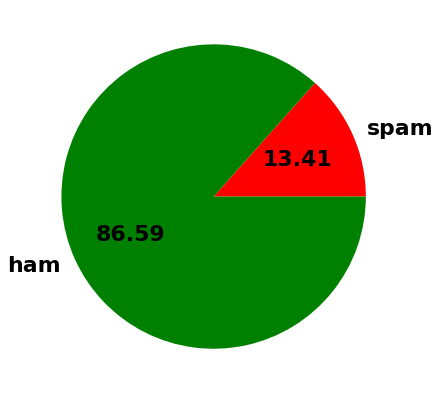

In [ ]:
font = {'family' : 'Tahoma',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

vc = [len(spamdata)/len(spamdata + hamdata), len(hamdata)/len(spamdata + hamdata)]
labels = ['spam', 'ham']
colors = ['red', 'green']
plt.figure(figsize=(15, 7))
plt.pie(vc,autopct='%.2f', labels=labels, colors=colors)
plt.show()

### <font color="blue"><b>Word clouds for spam and ham</b></font>

In [ ]:
def plot_WordCloud(text_list):
    unique_string=(" ").join(text_list)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

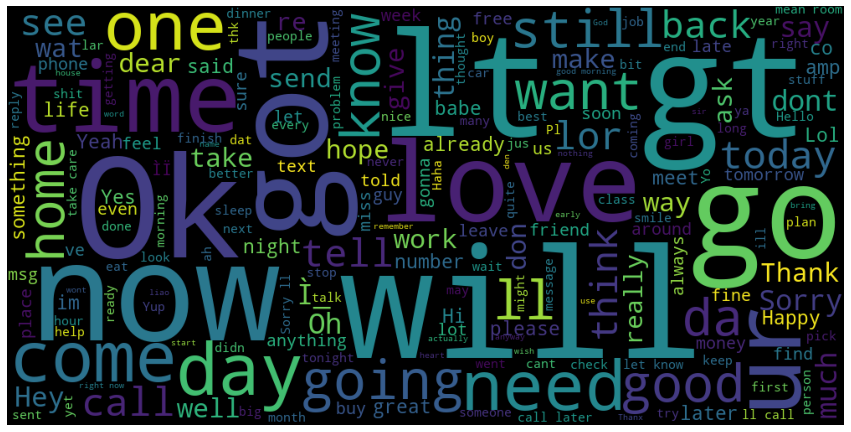

In [ ]:
plot_WordCloud(hamdata["v2"])

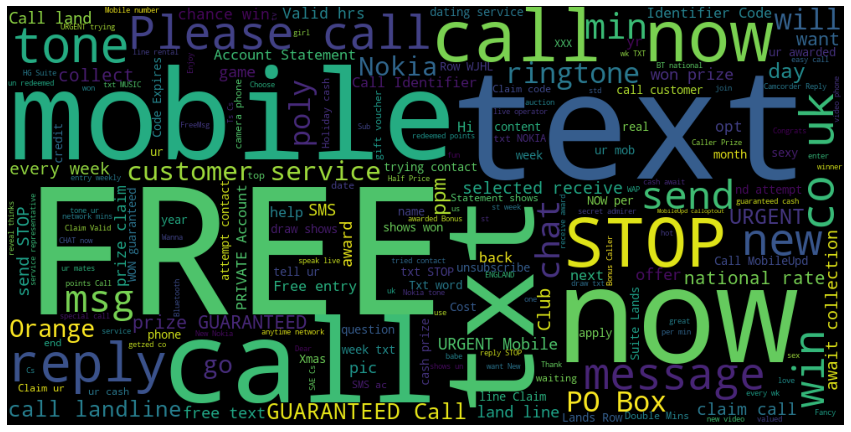

In [ ]:
plot_WordCloud(spamdata["v2"])

### <font color="blue">**Remove Stopwords and Delimeter**</font>

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


lingspam['v2'].apply(text_process)
lingspam.head(5)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, wkly, comp, win, FA, Cup, final,...
3           [U, dun, say, early, hor, U, c, already, say]
4          [Nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [nd, time, tried, contact, u, U, å, Pound, pri...
5568                   [Ì, b, going, esplanade, fr, home]
5569                            [Pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [Rofl, true, name]
Name: v2, Length: 5572, dtype: object

,v1,v2
0,ham,Go until jurong point crazy Available only ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in a wkly comp to win FA Cup final...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I don t think he goes to usf he lives aro...


### <font color="blue">**Lemmatization**</font><br/>In simpler terms, it is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors. For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care’, whereas, stemming would cutoff the ‘ing’ part and convert it to car. Lemmatization can be implemented in python by using Wordnet Lemmatizer, Spacy Lemmatizer, TextBlob, Stanford CoreNLP

In [ ]:
lemmatizer = WordNetLemmatizer()

print('With out Lammetization - ', lingspam['v2'][2])

Lemmatized = lingspam['v2'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print('With Lemmatization -     ',  Lemmatized[2])

With out Lammetization -  Free entry in  a wkly comp to win FA Cup final tkts st May   Text FA to  to receive entry question std txt rate T C s apply over s
With Lemmatization -      Free entry in a wkly comp to win FA Cup final tkts st May Text FA to to receive entry question std txt rate T C s apply over s


### <font color="blue">**Vectorization and TF-IDF weightin**g</font>

In [ ]:
# Bag-of-words counts as a vector
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(lingspam['v2'])

CountVectorizer(stop_words='english')

In [ ]:
#Creating bog of words
bow = vectorizer.transform(lingspam['v2'])

print('Shape of Sparse Matrix: ',bow.shape)
print('Amount of non-zero occurences:',bow.nnz)

Shape of Sparse Matrix:  (5572, 7510)
Amount of non-zero occurences: 41392


In [ ]:
tfidf_transformer=TfidfTransformer().fit(bow)

In [ ]:
# calculate idf for all bag of words
text_tfidf=tfidf_transformer.transform(bow)
print(text_tfidf.shape)

(5572, 7510)


In [ ]:
# check IDF- inverse document frequency of word 'test'
print(tfidf_transformer.idf_[vectorizer.vocabulary_['test']])

6.534646334211221


### <font color="blue">Find top 30 ham and spam words in messages and visualize them either by plot or word cloud.</font>

In [ ]:
#find frecounting frequently occurence of spam and ham.

count1 = Counter(" ".join(lingspam[lingspam['v1']=='spam']["v2"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of spam", 1 : "count"})
count2 = Counter(" ".join(lingspam[lingspam['v1']=='ham']["v2"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of ham", 1 : "count_"})

([<matplotlib.axis.XTick at 0x7fd155609910>,
 [Text(0, 0, 'to'),
  Text(0, 0, 'a'),
  Text(0, 0, 'å'),
  Text(0, 0, 'call'),
  Text(0, 0, 'you'),
  Text(0, 0, 'your'),
  Text(0, 0, 'or'),
  Text(0, 0, 'the'),
  Text(0, 0, 'for'),
  Text(0, 0, 'is'),
  Text(0, 0, 'p'),
  Text(0, 0, 'now'),
  Text(0, 0, 'Call'),
  Text(0, 0, 'on'),
  Text(0, 0, 'have'),
  Text(0, 0, 'and'),
  Text(0, 0, 'FREE'),
  Text(0, 0, 'from'),
  Text(0, 0, 'U'),
  Text(0, 0, 'ur'),
  Text(0, 0, 'with'),
  Text(0, 0, 'mobile'),
  Text(0, 0, 'www'),
  Text(0, 0, 'of'),
  Text(0, 0, 'txt'),
  Text(0, 0, 'You'),
  Text(0, 0, 's'),
  Text(0, 0, 'claim'),
  Text(0, 0, 'T'),
  Text(0, 0, 'are')])

Text(0.5, 1.0, 'Top 30 words of spam')

Text(0.5, 0, 'words')

Text(0, 0.5, 'number')

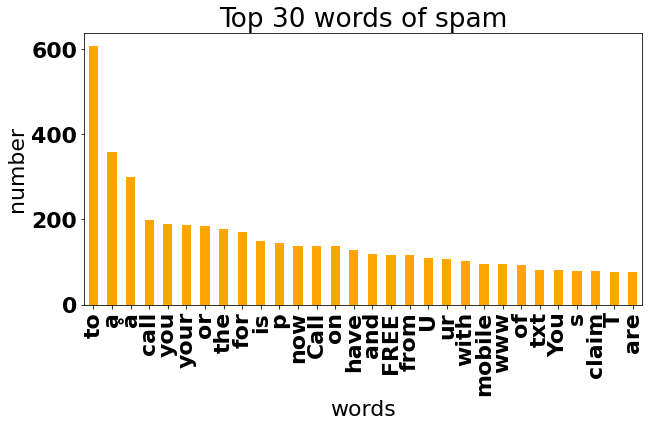

In [ ]:
data1.plot.bar(legend = False, color = 'orange',figsize = (10,5))
y_pos = np.arange(len(data1["words of spam"]))
plt.xticks(y_pos, data1["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

([<matplotlib.axis.XTick at 0x7fd1553b5310>,
 [Text(0, 0, 'I'),
  Text(0, 0, 'you'),
  Text(0, 0, 'to'),
  Text(0, 0, 'the'),
  Text(0, 0, 'i'),
  Text(0, 0, 'a'),
  Text(0, 0, 'in'),
  Text(0, 0, 'u'),
  Text(0, 0, 'and'),
  Text(0, 0, 'me'),
  Text(0, 0, 'is'),
  Text(0, 0, 'my'),
  Text(0, 0, 'it'),
  Text(0, 0, 'of'),
  Text(0, 0, 'for'),
  Text(0, 0, 'that'),
  Text(0, 0, 's'),
  Text(0, 0, 'm'),
  Text(0, 0, 'your'),
  Text(0, 0, 't'),
  Text(0, 0, 'on'),
  Text(0, 0, 'not'),
  Text(0, 0, 'have'),
  Text(0, 0, 'can'),
  Text(0, 0, 'at'),
  Text(0, 0, 'are'),
  Text(0, 0, 'be'),
  Text(0, 0, 'gt'),
  Text(0, 0, 'lt'),
  Text(0, 0, 'so')])

Text(0.5, 1.0, 'Top 30 words of ham')

Text(0.5, 0, 'words')

Text(0, 0.5, 'number')

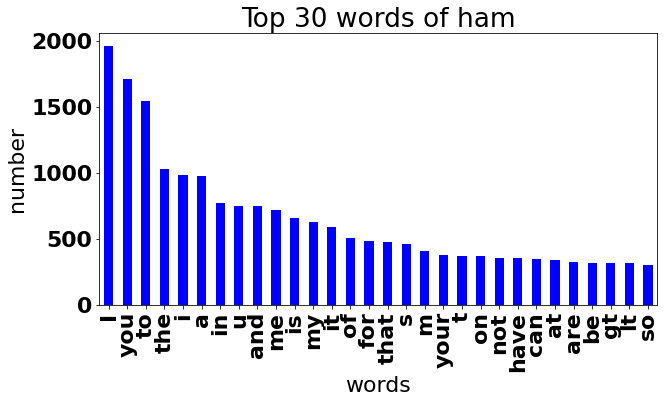

In [ ]:
data2.plot.bar(legend = False, color = 'blue', figsize = (10,5))
y_pos = np.arange(len(data2["words of ham"]))
plt.xticks(y_pos, data2["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

#<font color='brown'><b>Model creation and prediction</b></font><br><br>
## <font color="blue">Train-Test Split and perform the classification task using the Naive Bayes classification model. <br> </font>

In [ ]:
x = lingspam['v2']
y = lingspam['v1']

len(x), len(y)

(5572, 5572)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4179 4179
1393 1393


### <font color="blue">**Model creation and prediction**</font><br><br><font color="green"><b>naive bayes classifier</b></font>

In [ ]:
# instantiate the vectorizer
count = CountVectorizer()
count.fit(x)

x_train_num = count.transform(x_train)
x_test_num = count.transform(x_test)

CountVectorizer()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model - CountVectorizer model
nb.fit(x_train_num, y_train)

MultinomialNB()

In [ ]:
# Class and probability predictions
yp_class = nb.predict(x_test_num)
yp_prob = nb.predict_proba(x_test_num)[:, 1]

In [ ]:
categories=['Safe', 'Spam']
def seaborn_conf(y, ypred):
    y_true = ["Safe", "Spam"]
    y_pred = ["Safe", "Spam"]
    cf = confusion_matrix(y, ypred)
    df_cm = pd.DataFrame(cf, columns=np.unique(y_true), index = np.unique(y_true))
    plt.figure(figsize=(8,6))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title('Confusion matrix')
    plt.xlabel('Predicted value')
    plt.ylabel('Real value')
    plt.show()



Model accuracy score is -  0.9791816223977028 




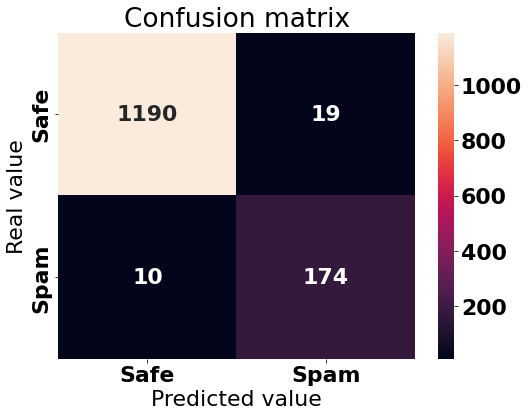

In [ ]:
print('\n\nModel accuracy score is - ',metrics.accuracy_score(y_test, yp_class),'\n\n')
seaborn_conf(y_test, yp_class)

In [ ]:
#model acuracy score
metrics.roc_auc_score(y_test, yp_prob)

0.9886719171431653

### <font color="green"><b>Naive Bayes + TF-IDF</b></font>

In [ ]:
pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])



Model accuracy score is -  0.9547738693467337 




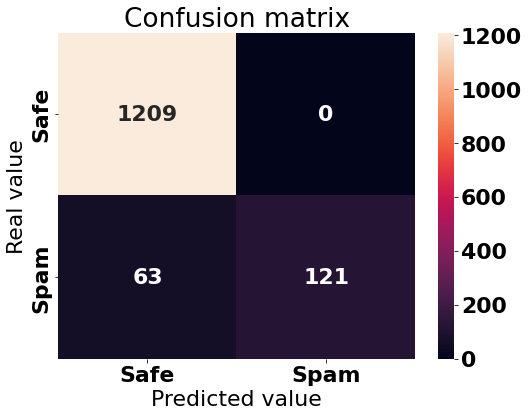

In [ ]:
pipe.fit(x_train, y_train)
yp_class = pipe.predict(x_test)
print('\n\nModel accuracy score is - ',metrics.accuracy_score(y_test, yp_class),'\n\n')
seaborn_conf(y_test, yp_class)

### <font color="green"><b>XGBoost</b></font>

In [ ]:
import xgboost as xgb
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=6,
        n_estimators=90,
        use_label_encoder=False,
        eval_metric='auc'
    ))
    ]
)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 XGBClassifier(eval_metric='auc', max_depth=6, n_estimators=90,
                               use_label_encoder=False))])



Training accuracy score: 0.9899497487437185 




Testing accuracy score: 0.9734386216798278 




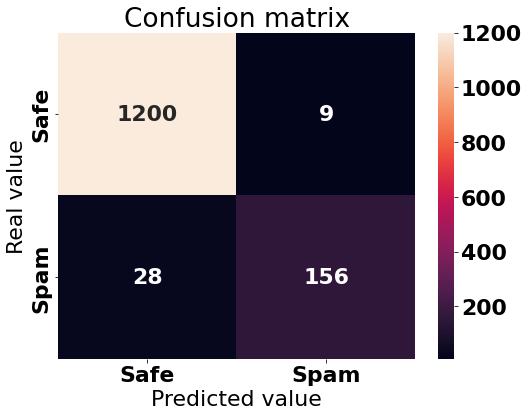

In [ ]:
pipe.fit(x_train, y_train)
yp_class_test = pipe.predict(x_test)
yp_class_train = pipe.predict(x_train)

print('\n\nTraining accuracy score: {}'.format(metrics.accuracy_score(y_train, yp_class_train)),'\n\n')
print('\n\nTesting accuracy score: {}'.format(metrics.accuracy_score(y_test, yp_class_test)),'\n\n')

seaborn_conf(y_test, yp_class_test)